In [1]:
import pygmt

## Location of drill core IODP Site U1553
This notebook shows different maps of IODP Site U1553, on the Southern Campbell Plateau (south of New Zealand), using package pygmt (https://www.pygmt.org/latest/)

### 1) Overview World Map

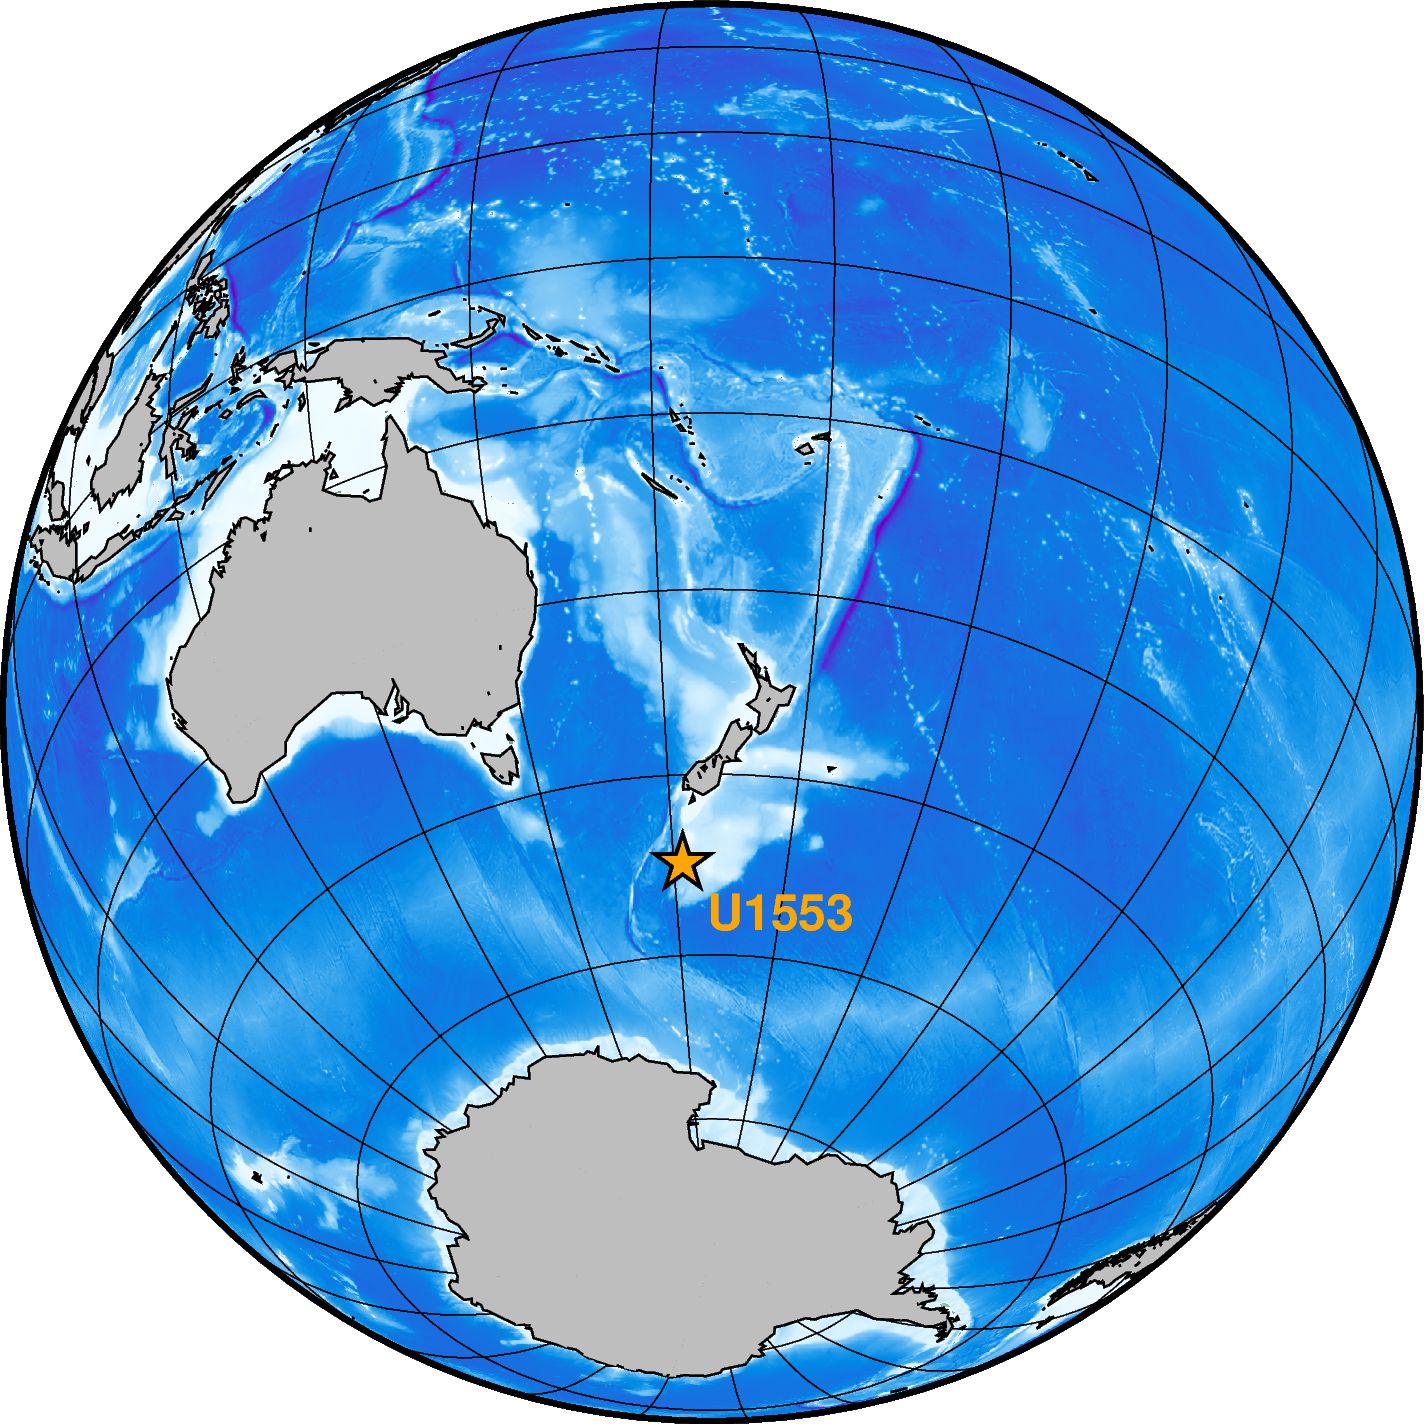

In [9]:
grad= pygmt.datasets.load_earth_relief(resolution="06m")

fig = pygmt.Figure()
fig.grdimage(grid=grad, projection="G170/-40/12c" ,region="g", cmap="terra", frame="ag")
fig.coast(frame=True, shorelines=0.5, land="grey")
fig.plot(x=166.192, y=-52.225, style="a0.5c", fill="orange", pen="0.8p,black")

# Add a label for the drilling hole
fig.text(x=180, y=-56, text="U1553", font="12p,Helvetica-Bold, orange", justify="CM")

fig.show()


Global locator map using a global perspective projection centered on the study area. This view is intended for geographic orientation (where the site is on the globe) rather than quantitative distance/area comparison.

### 2) Mercator Projection and shading/high contour 

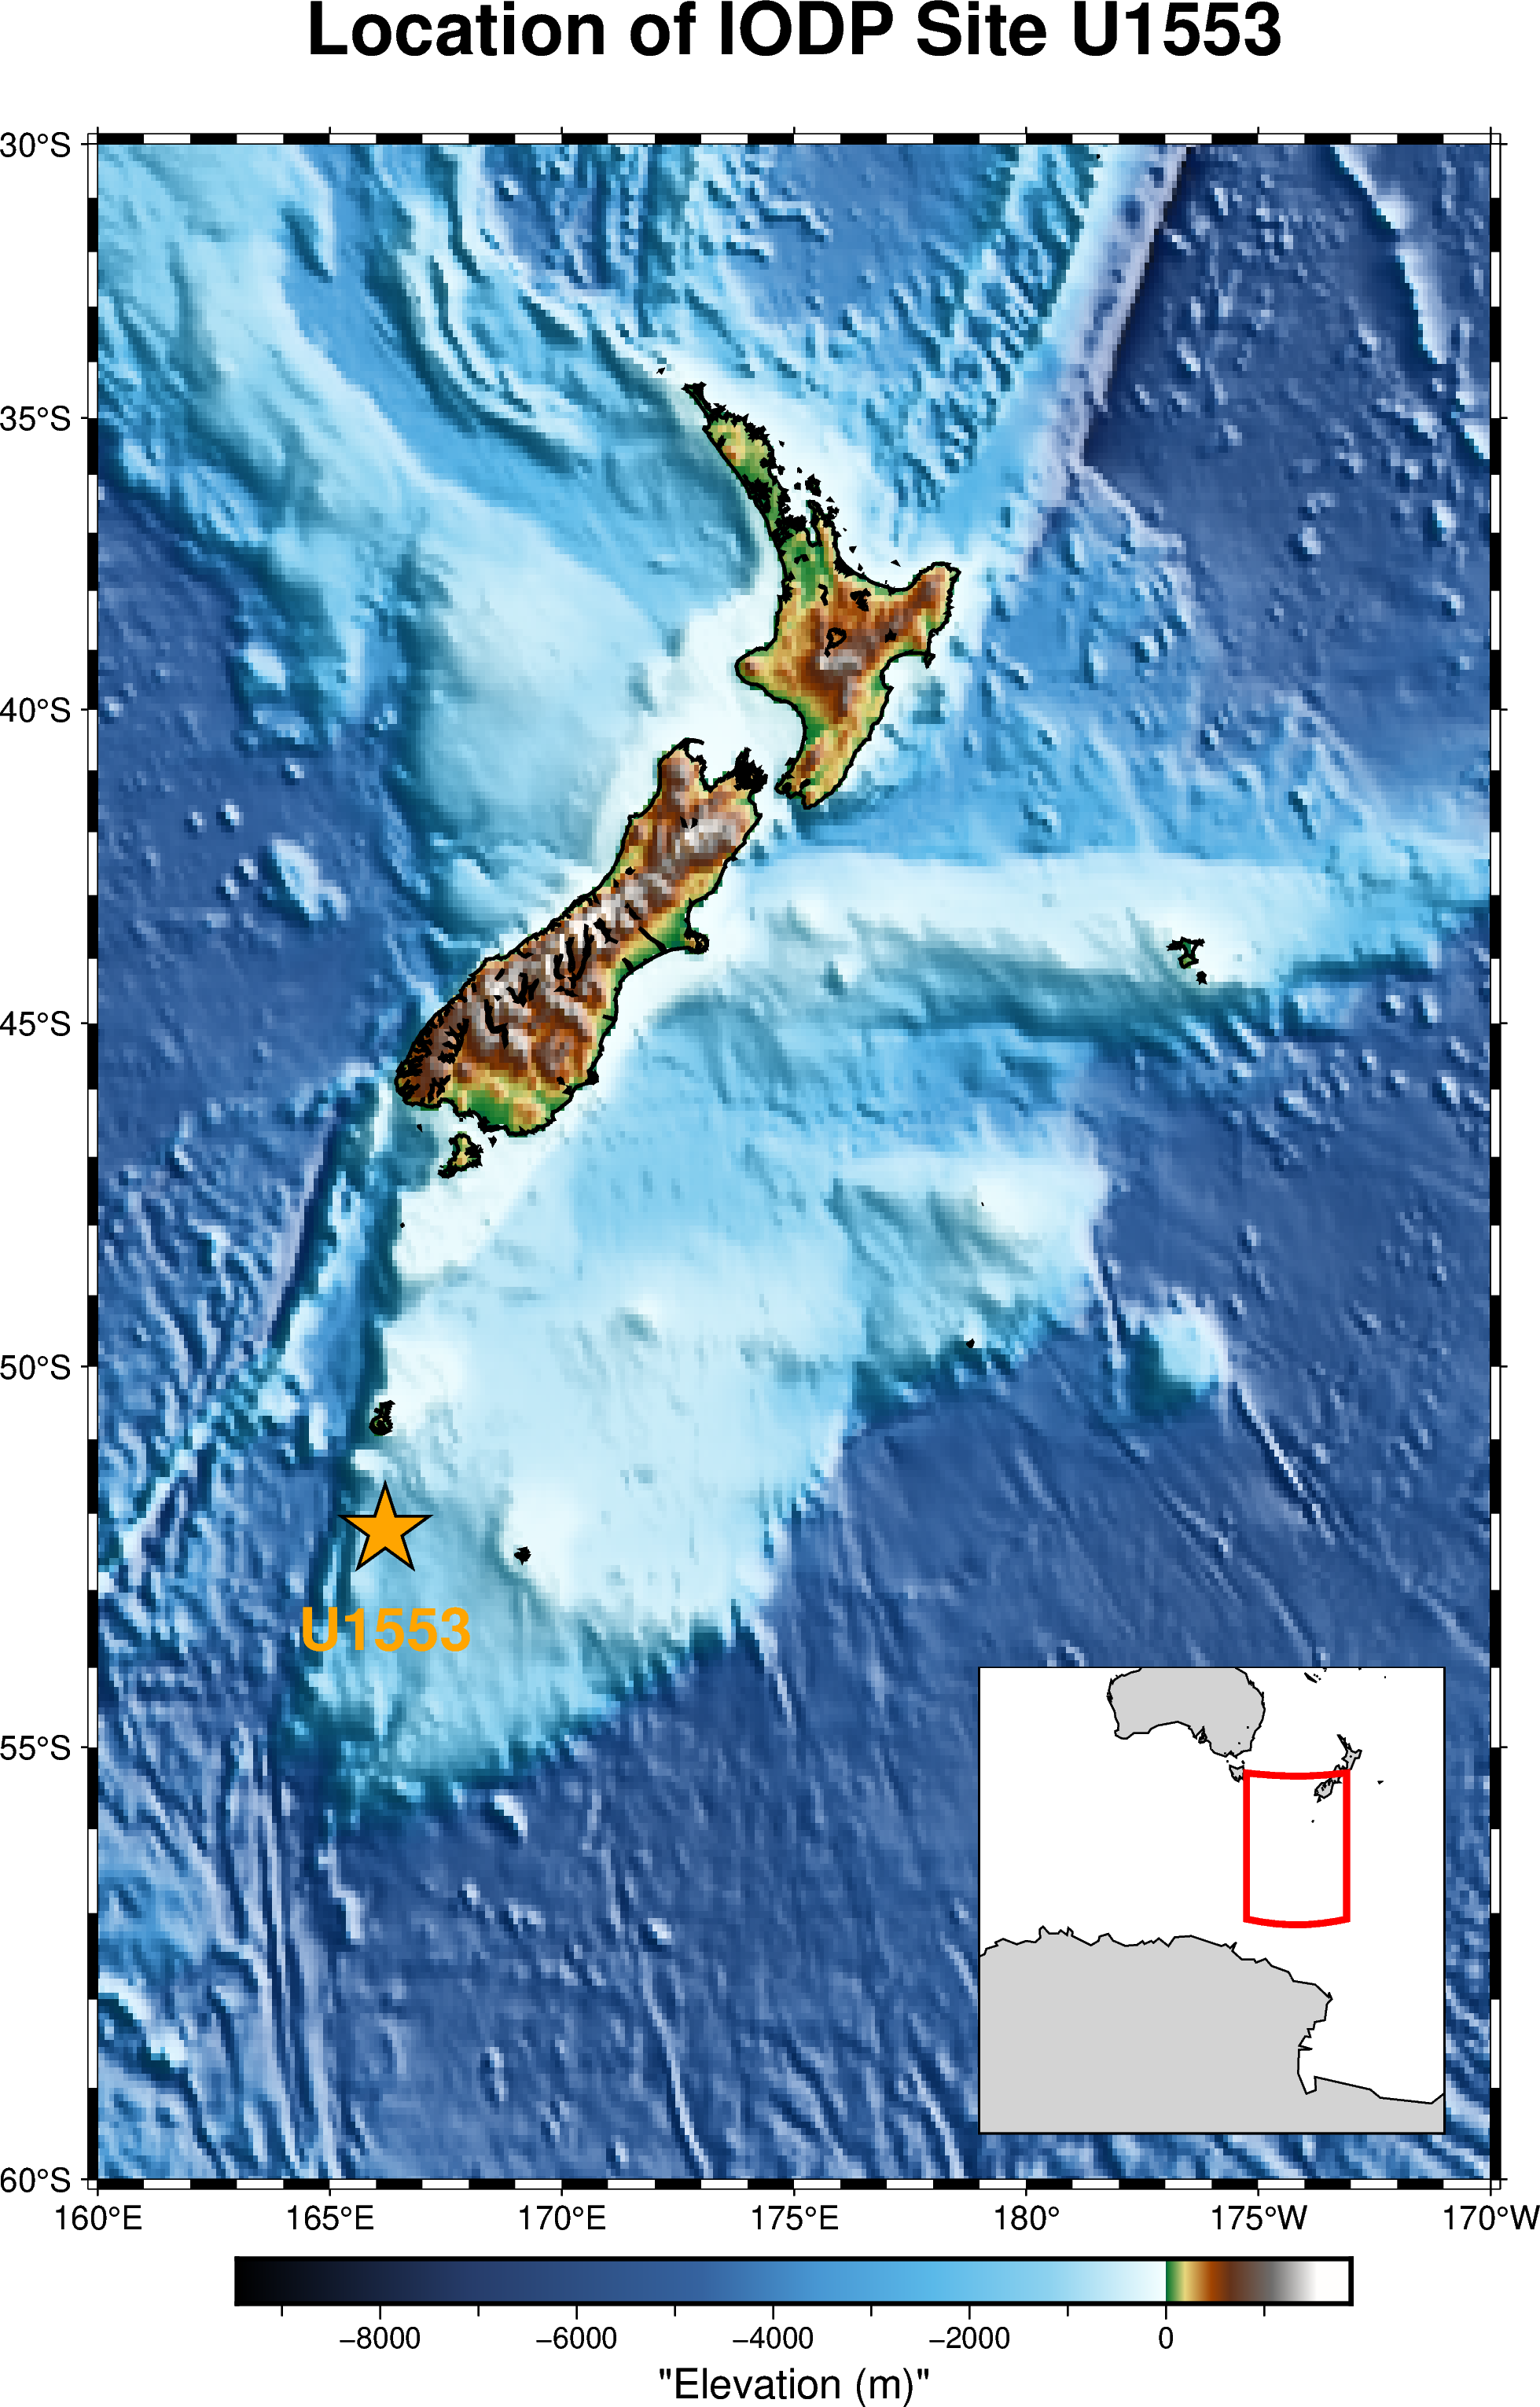

In [23]:
# Load Earth Relief
# -----------------------------------------------------
grad = pygmt.datasets.load_earth_relief(resolution="06m", region=region_main)
shade = pygmt.grdgradient(
    grad,
    azimuth=45,        # Beleuchtungsrichtung
    normalize="t1"     # kontrollierte Stärke; alternativ z.B. "e0.6"
)
fig = pygmt.Figure()

# -----------------------------------------------------
# Main Map (New Zealand region)
# -----------------------------------------------------
region_main = [160, 190, -60, -30]
projection_main = "M15c"   # Mercator, 15 cm width

fig.grdimage(
    grid=grad,
    region=region_main,
    projection=projection_main,
    cmap="geo",         
    shading=shade,       # automatic hillshade
    frame=["af", "+tLocation of IODP Site U1553"]
)

fig.coast(
    shorelines="1p,black",
#    land='gray'
)
fig.plot(x=166.192, y=-52.225, style="a1c", fill="orange", pen="0.8p,black")
fig.text(x=166.192, y=-53.5, text="U1553", font="18p,Helvetica-Bold, orange", justify="CM")
fig.colorbar(frame='af+l"Elevation (m)"')

# -----------------------------------------------------
# Inset Map (bottom right)
# -----------------------------------------------------
with fig.inset(
    position="jBR+w5c+o0.5c",   # bottom-right, width 5 cm
    box="+p1p"
):

    region_inset = [80, 200, -80, 0]
    projection_inset = "M5c"

    fig.coast(
        region=region_inset,
        projection=projection_inset,
        land="lightgray",
        water="white",
        shorelines="0.5p,black",
        frame="af"
    )

    # Red rectangle marking NZ region
    fig.plot(
        x=[160, 190, 190, 160, 160],
        y=[-60, -60, -30, -30, -60],
        pen="2p,red"
    )

fig.show()

The regional map is shown in a Mercator projection, which preserves local angles and shapes, making coastlines and bearings easy to interpret. Distortions increase with latitude, so area and distance should not be interpreted quantitatively at higher southern latitudes.

### 3) Cylindrical equidistant projection without shading

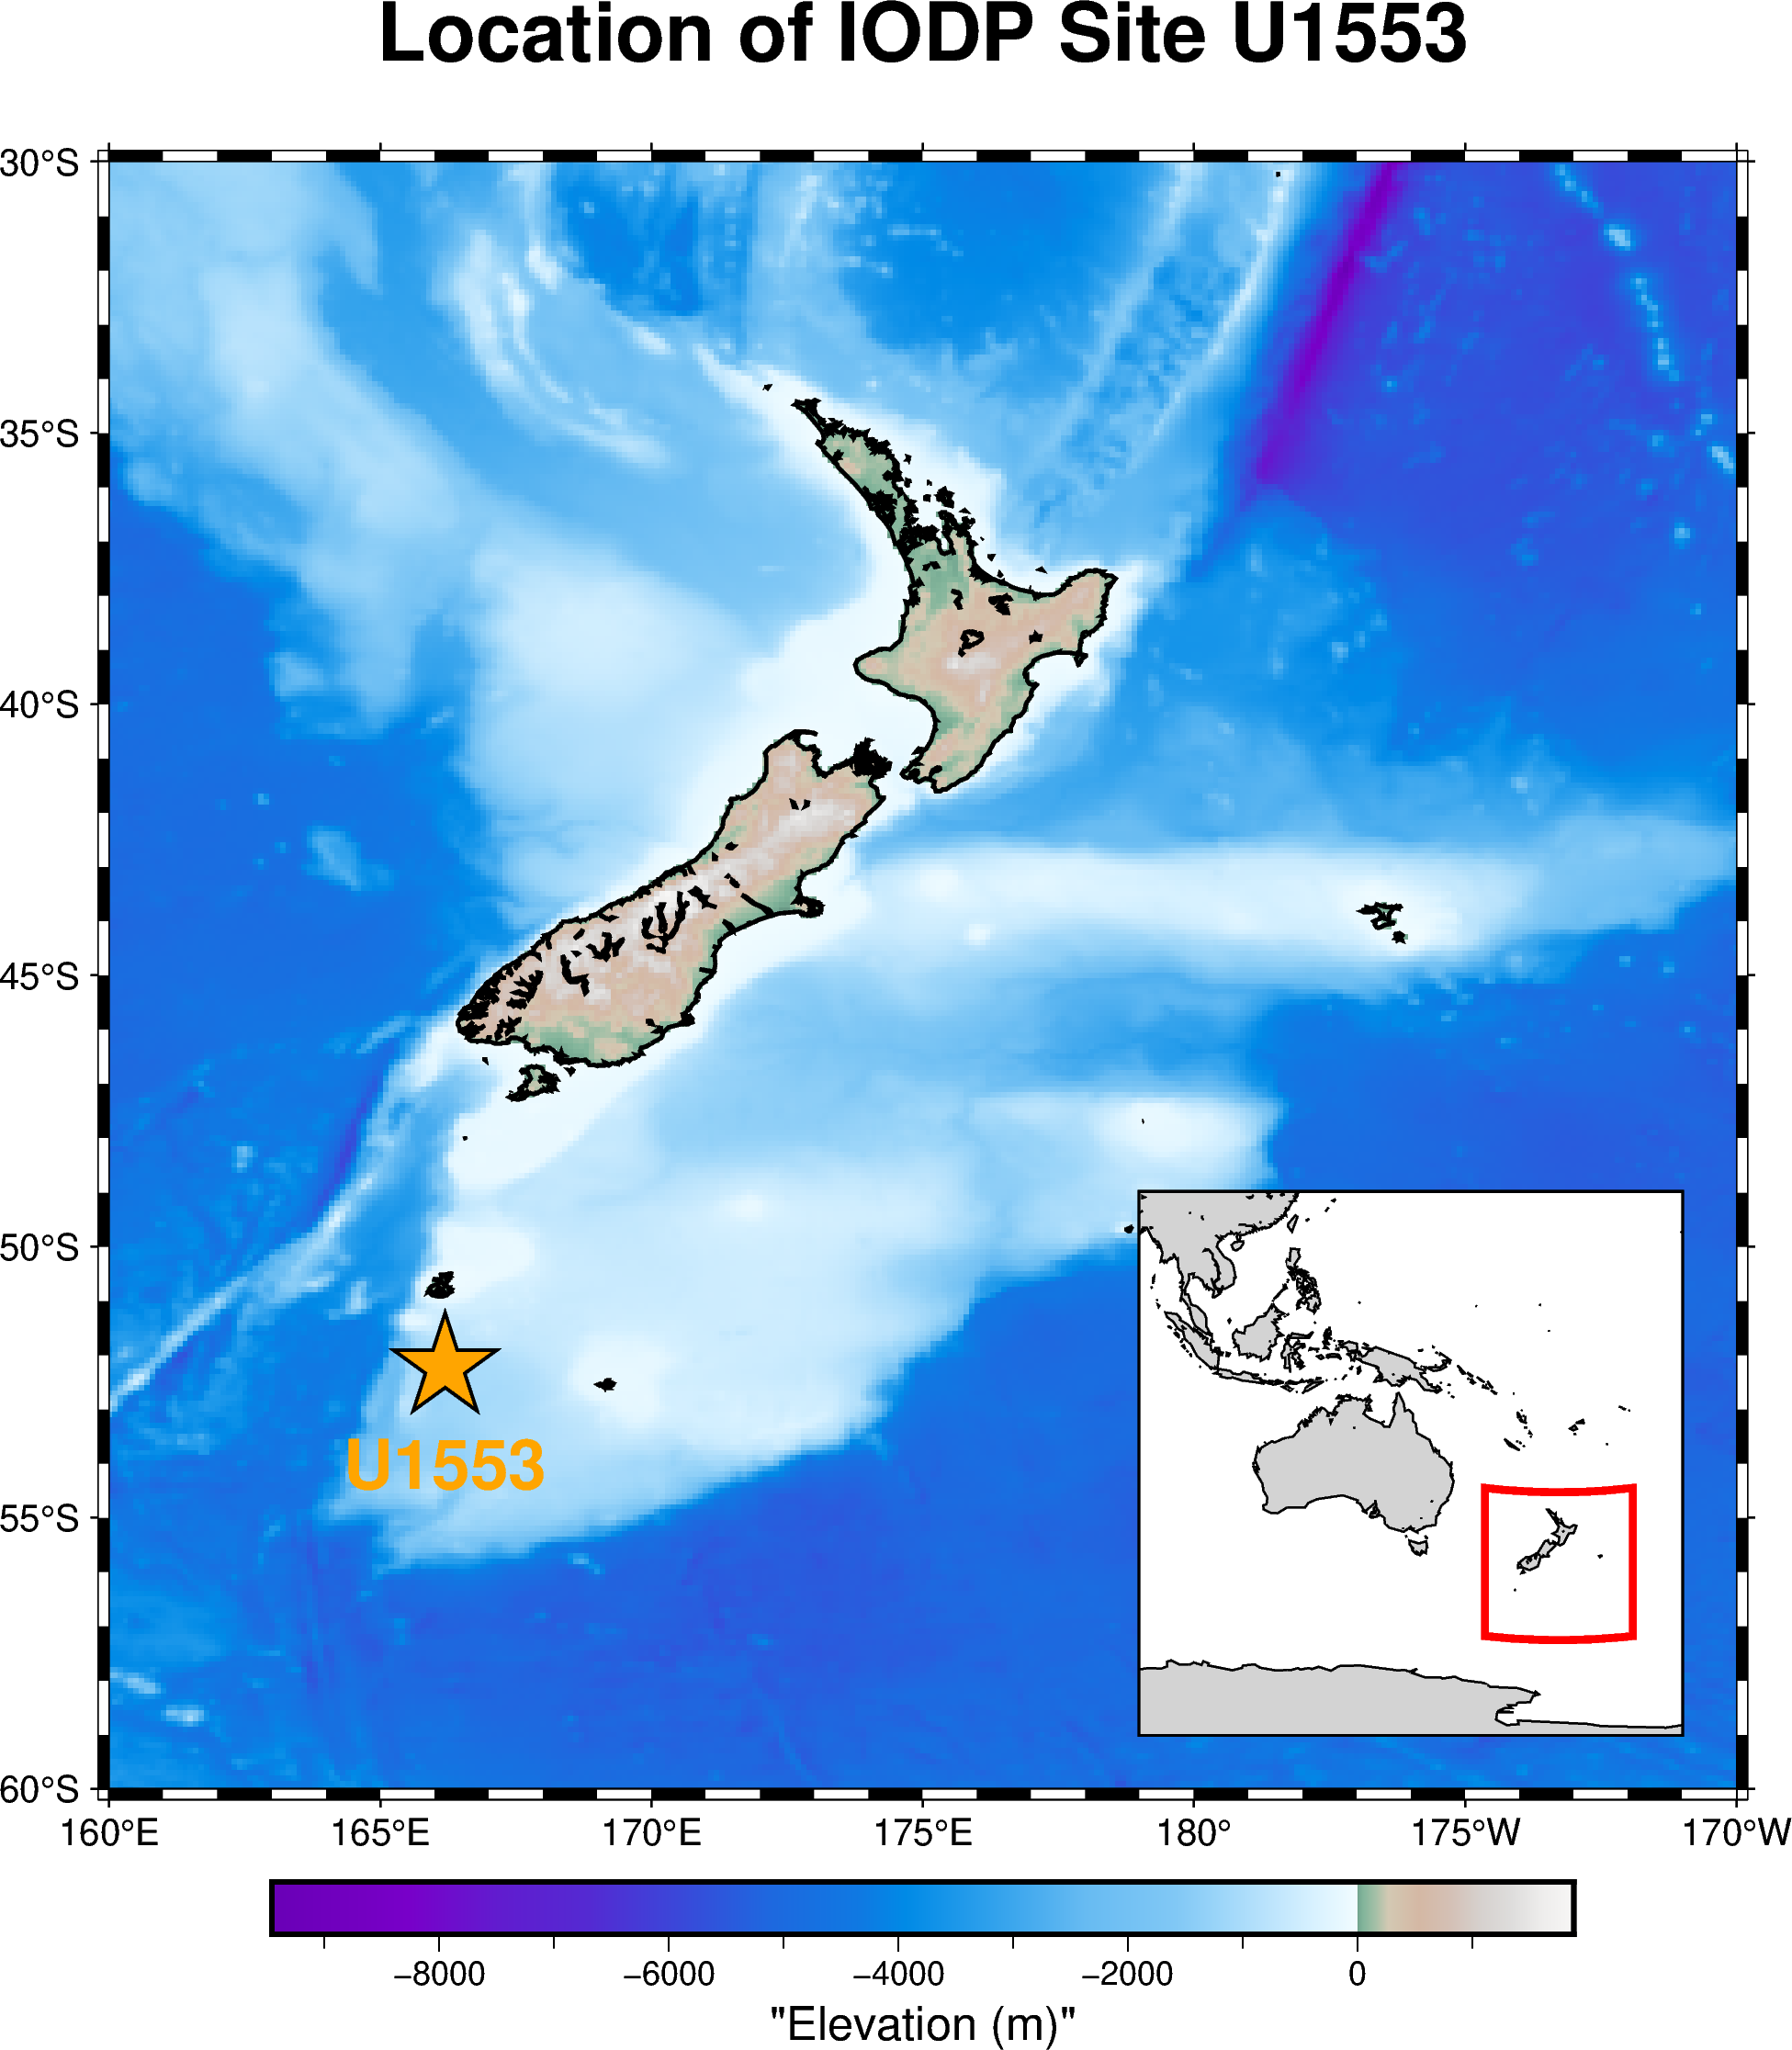

In [14]:
# Load Earth Relief
# -----------------------------------------------------
grad = pygmt.datasets.load_earth_relief(resolution="06m")
fig = pygmt.Figure()

# -----------------------------------------------------
# Main Map (New Zealand region)
# -----------------------------------------------------
region_main = [160, 190, -60, -30]  # NZ region
projection_main = "Q15c"            # Cylindrical Equidistant, 15 cm width

fig.grdimage(
    grid=grad,
    region=region_main,
    projection=projection_main,
    cmap="terra",
    shading=False,
    frame=["af", "+tLocation of IODP Site U1553"]
)

fig.coast(
    shorelines="1p,black",
#    land="gray"
)
fig.plot(x=166.192, y=-52.225, style="a1c", fill="orange", pen="0.8p,black")
fig.text(x=166.192, y=-54, text="U1553", font="18p,Helvetica-Bold, orange", justify="CM")

fig.colorbar(frame='af+l"Elevation (m)"')


# -----------------------------------------------------
# Inset Map - Regional Zoom
# -----------------------------------------------------
with fig.inset(position="jBR+w5c+o0.5c", box="+p1p"):
    # Define a regional extent around NZ (slightly larger than main map)
    region_regional = [90, 200, -80, 30]  # Slight buffer
    projection_inset = "Q5c"

    fig.coast(
        region=region_regional,
        projection=projection_inset,
        land="lightgray",
        water="white",
        shorelines="0.5p,black",
        frame="af"
    )

    # Red rectangle marking main NZ map
    fig.plot(
        x=[region_main[0], region_main[1], region_main[1], region_main[0], region_main[0]],
        y=[region_main[2], region_main[2], region_main[3], region_main[3], region_main[2]],
        pen="2p,red"
    )

fig.show()

A cylindrical equidistant projection is used as an alternative view, providing a simple latitude–longitude grid with uniform spacing along meridians. This can be convenient for comparing positions in geographic coordinates, although shapes and areas are still distorted away from the equator.